# Logistic Regression

Logistic regression is a supervised classification is unique Machine Learning algorithms in Python that finds its use in estimating discrete values like 0/1, yes/no, and true/false. This is based on a given set of independent variables. We use a logistic function to predict the probability of an event and this gives us an output between 0 and 1.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
xmin,xmax=-7,7 #Test set; straight line with Gaussian noise
n_samples=77
np.random.seed(0)
x=np.random.normal(size=n_samples)
y=(x>0).astype(np.float)
x[x>0]*=3
x+=.4*np.random.normal(size=n_samples)
x=x[:,np.newaxis]
clf=linear_model.LogisticRegression(C=1e4) #Classifier
clf.fit(x,y)
plt.figure(1,figsize=(3,4))
# Figure size 300x400 with 0 Axes>
plt.clf()
plt.scatter(x.ravel(),y,color='lavender',zorder=17)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


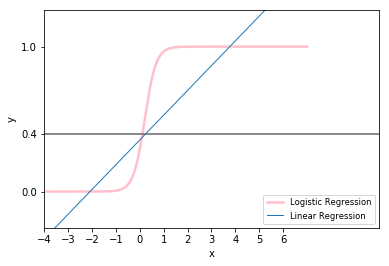

In [16]:
x_test=np.linspace(-7,7,277)
def model(x):
    return 1/(1+np.exp(-x))
loss=model(x_test*clf.coef_+clf.intercept_).ravel()
plt.plot(x_test,loss,color='pink',linewidth=2.5)
ols=linear_model.LinearRegression()
ols.fit(x,y)
plt.plot(x_test,ols.coef_*x_test+ols.intercept_,linewidth=1)
plt.axhline(.4,color='.4')
plt.ylabel('y')
plt.xlabel('x')
plt.xticks(range(-7,7))
plt.yticks([0,0.4,1])
plt.ylim(-.25,1.25)
plt.xlim(-4,10)
plt.legend(('Logistic Regression','Linear Regression'),loc='lower right',fontsize='small')
plt.show()


# Logistic Regression

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [39]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Correlation Check

In [41]:
correlation =data.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


# Visualizing the data for any Relations

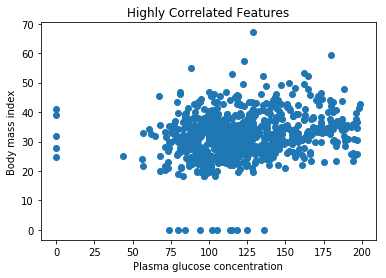

In [42]:
def visualise(data):
    fig, ax = plt.subplots()
    ax.scatter(data.iloc[:,1].values, data.iloc[:,5].values)
    ax.set_title('Highly Correlated Features')
    ax.set_xlabel('Plasma glucose concentration')
    ax.set_ylabel('Body mass index')

visualise(data)

# Replacing the Zeros with Null values

In [43]:
data[['Glucose','BMI']] = data[['Glucose','BMI']].replace(0, np.NaN)
data.dropna(inplace=True)

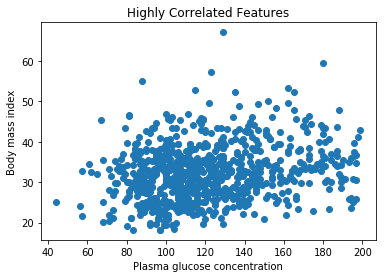

In [44]:
visualise(data)

# Feature Selection

In [47]:
X = data[['Glucose','BMI','Pregnancies','BloodPressure','SkinThickness','Insulin',
          'DiabetesPedigreeFunction','Age']].values
y = data[['Outcome']].values

# Standardization & Scaling of Features

In [48]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [49]:
mean = np.mean(X, axis=0)
print('Mean: (%d, %d)' % (mean[0], mean[1]))
standard_deviation = np.std(X, axis=0)
print('Standard deviation: (%d, %d)' % (standard_deviation[0], standard_deviation[1]))

Mean: (0, 0)
Standard deviation: (1, 1)


In [50]:
print(X[0:10,:])

[[ 0.85211873  0.16540919  0.63710986  0.1253525   0.89727837 -0.70219989
   0.46667123  1.42608616]
 [-1.2079944  -0.84552075 -0.84527447 -0.20233607  0.52039138 -0.70219989
  -0.36997511 -0.19762243]
 [ 1.99662603 -1.322102    1.2300636  -0.31156559 -1.30122904 -0.70219989
   0.60308096 -0.11216408]
 [-1.07719357 -0.62889291 -0.84527447 -0.20233607  0.1435044   0.10920865
  -0.92773934 -1.05220589]
 [ 0.49241644  1.53738552 -1.14175134 -1.62231987  0.89727837  0.74797707
   5.5017059  -0.02670573]
 [-0.19428794 -0.98993931  0.340633    0.23458202 -1.30122904 -0.70219989
  -0.82467421 -0.28308077]
 [-1.43689586 -0.21007908 -0.25232074 -1.07617225  0.70883487  0.05741661
  -0.68220183 -0.62491416]
 [-0.22698815  0.41092074  1.82301733 -3.80691032 -1.30122904 -0.70219989
  -1.02777314 -0.36853912]
 [ 2.45442895 -0.28228836 -0.5487976   0.01612297  1.52542334  3.98497922
  -0.95502128  1.6824612 ]
 [-0.39048919  0.74308343  0.04415613  1.21764772 -1.30122904 -0.70219989
  -0.85498748 -0.

# Train-Test Split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Logistic Regression Model

In [52]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# Predictions

In [54]:
y_pred=logreg.predict(X_test)

In [55]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

# Performance & Accuracy

In [56]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[90, 14],
       [17, 30]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

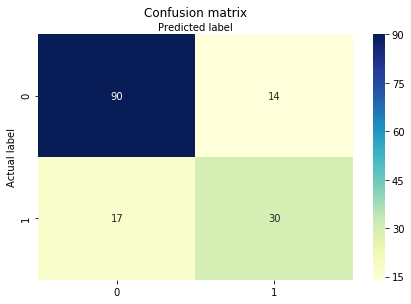

In [57]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [58]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7947019867549668
Precision: 0.6818181818181818
Recall: 0.6382978723404256


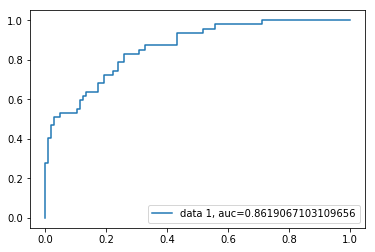

In [59]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Logistic Regression (Another code)


In [60]:
%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()

In [61]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


In [62]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [63]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

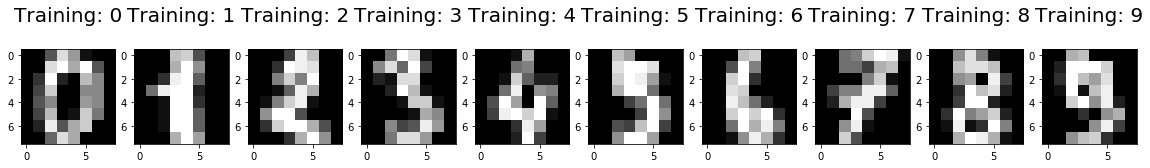

In [64]:
import numpy as np 
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
clf = LogisticRegression(C = 10.0, solver='saga', random_state=12, max_iter=2000, tol=0.0001, multi_class ='auto')

In [68]:
clf.fit(x_train, y_train)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=2000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=12, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [69]:
# Returns a NumPy Array
# Predict for One Observation (image)
clf.predict(x_test[0].reshape(1,-1))

array([2])

In [70]:
# Predict for Multiple Observations (images) at Once
clf.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [71]:
# Make predictions on entire test data
predictions = clf.predict(x_test)

In [72]:
predictions

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 9, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 4, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 9, 8, 2, 1, 5, 2, 5, 8, 4, 1, 7, 0, 6, 1, 5, 5, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 9, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 9, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 1, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 8, 4, 2, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 2, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 3, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

In [73]:
# Use score method to get accuracy of model
score = clf.score(x_test, y_test)
print(score)

0.9555555555555556


In [74]:
import numpy as np 

import seaborn as sns
from sklearn import metrics

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.95      0.97        44
           3       0.93      0.96      0.95        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

   micro avg       0.96      0.96      0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



In [76]:
cm = metrics.confusion_matrix(y_test, predictions)

In [77]:
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 42  2  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


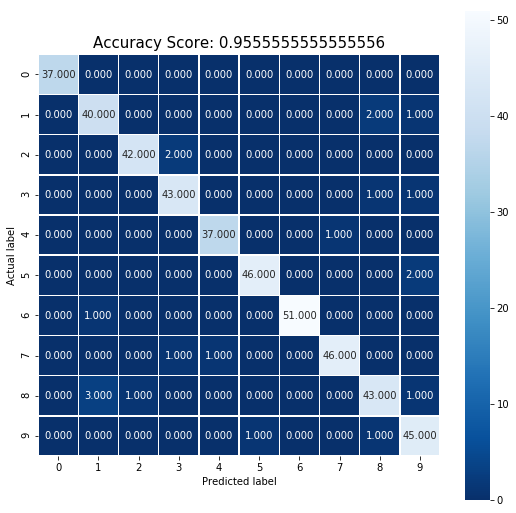

In [78]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
#plt.show();

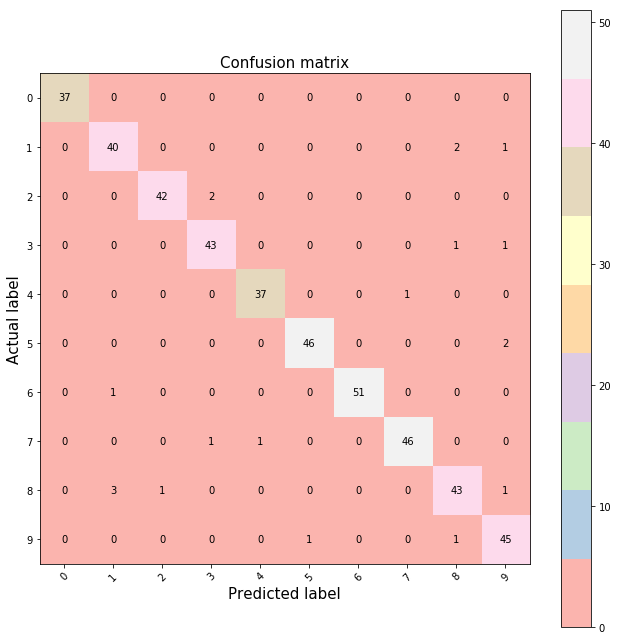

In [79]:
cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape

for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')
plt.savefig('toy_Digits_ConfusionMatplotlibCodementor.png')

# Another example (Logit algorithms) 

The dataset comes from the UCI Machine Learning repository, and it is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict whether the client will subscribe (1/0) to a term deposit (variable y).

https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [19]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [23]:
data = pd.read_csv('banking.csv', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [24]:
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
5,30,management,divorced,basic.4y,no,yes,no,cellular,jul,tue,...,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
6,37,blue-collar,married,basic.4y,no,yes,no,cellular,may,thu,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0
7,39,blue-collar,divorced,basic.9y,no,yes,no,cellular,may,fri,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
8,36,admin.,married,university.degree,no,no,no,cellular,jun,mon,...,1,3,1,success,-2.9,92.963,-40.8,1.266,5076.2,1
9,27,blue-collar,single,basic.4y,no,yes,no,cellular,apr,thu,...,2,999,1,failure,-1.8,93.075,-47.1,1.410,5099.1,0


In [26]:
data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [28]:
# Let us group “basic.4y”, “basic.9y” and “basic.6y” together and call them “basic”.
data['education'] = np.where(data['education'] == 'basic.4y', 'Basic',data['education'])
data['education'] = np.where(data['education'] == 'basic.9y', 'Basic',data['education'])
data['education'] = np.where(data['education'] == 'basic.6y', 'Basic',data['education'])


In [29]:
data['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

In [30]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

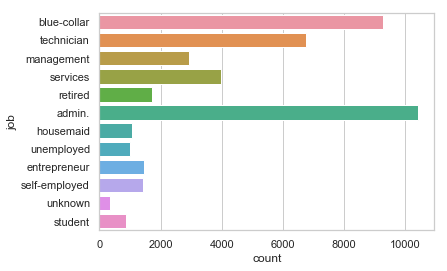

In [41]:
sns.countplot(y="job", data=data)
plt.show()

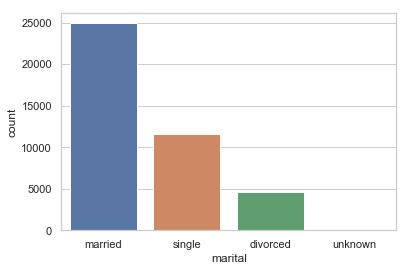

In [42]:
sns.countplot(x="marital", data=data)
plt.show()

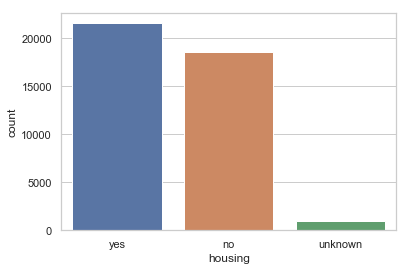

In [43]:
sns.countplot(x="housing", data=data)
plt.show()

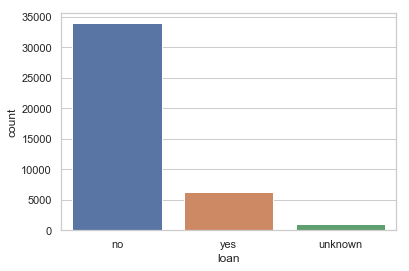

In [44]:
sns.countplot(x="loan", data=data)
plt.show()

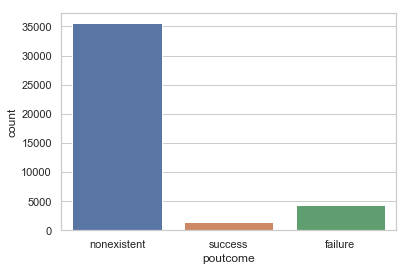

In [45]:
sns.countplot(x="poutcome", data=data)
plt.show()



Our prediction will be based on the customer’s job, marital status, whether he(she) has credit in default, whether he(she) has a housing loan, whether he(she) has a personal loan, and the outcome of the previous marketing campaigns. So, we will drop the variables that we do not need.

In [46]:
data.drop(data.columns[[0, 3, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19]], axis=1, inplace=True)

In [55]:
data.head()

,job,marital,default,housing,loan,poutcome,y
0,blue-collar,married,unknown,yes,no,nonexistent,0
1,technician,married,no,no,no,nonexistent,0
2,management,single,no,yes,no,success,1
3,services,married,no,no,no,nonexistent,0
4,retired,married,no,yes,no,success,1


In [56]:
data2 = pd.get_dummies(data, columns = ['job', 'marital', 'default', 'housing', 'loan', 'poutcome'])

In [57]:
data2.head()

,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [58]:
data2.drop(data2.columns[[12, 16, 18, 21, 24]], axis=1, inplace=True)
data2.columns

Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [63]:
data2.head()

,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
2,1,0,0,0,0,1,0,0,0,0,...,1,1,0,0,1,1,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,1,0,0,1,0
4,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,1,0,0,0,1


                             y  job_admin.  job_blue-collar  job_entrepreneur  \
y                     1.000000    0.031426        -0.074423         -0.016644   
job_admin.            0.031426    1.000000        -0.313313         -0.111417   
job_blue-collar      -0.074423   -0.313313         1.000000         -0.103050   
job_entrepreneur     -0.016644   -0.111417        -0.103050          1.000000   
job_housemaid        -0.006505   -0.094595        -0.087492         -0.031113   
job_management       -0.000419   -0.160892        -0.148810         -0.052918   
job_retired           0.092221   -0.121502        -0.112378         -0.039962   
job_self-employed    -0.004663   -0.110021        -0.101759         -0.036186   
job_services         -0.032301   -0.190063        -0.175791         -0.062513   
job_student           0.093955   -0.085748        -0.079308         -0.028203   
job_technician       -0.006149   -0.257516        -0.238178         -0.084698   
job_unemployed        0.0147

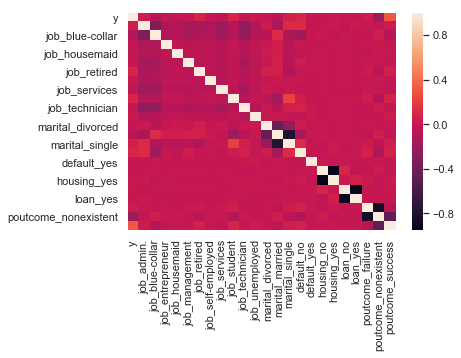

In [64]:
sns.heatmap(data2.corr())
plt.show(print (data2.corr()))

In [65]:
print(data2.corr())

                             y  job_admin.  job_blue-collar  job_entrepreneur  \
y                     1.000000    0.031426        -0.074423         -0.016644   
job_admin.            0.031426    1.000000        -0.313313         -0.111417   
job_blue-collar      -0.074423   -0.313313         1.000000         -0.103050   
job_entrepreneur     -0.016644   -0.111417        -0.103050          1.000000   
job_housemaid        -0.006505   -0.094595        -0.087492         -0.031113   
job_management       -0.000419   -0.160892        -0.148810         -0.052918   
job_retired           0.092221   -0.121502        -0.112378         -0.039962   
job_self-employed    -0.004663   -0.110021        -0.101759         -0.036186   
job_services         -0.032301   -0.190063        -0.175791         -0.062513   
job_student           0.093955   -0.085748        -0.079308         -0.028203   
job_technician       -0.006149   -0.257516        -0.238178         -0.084698   
job_unemployed        0.0147

In [66]:
data2.head()

,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
2,1,0,0,0,0,1,0,0,0,0,...,1,1,0,0,1,1,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,1,0,0,1,0
4,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,1,0,0,0,1


In [67]:
X = data2.iloc[:,1:]
y = data2.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [68]:
X_train.shape

(30891, 23)

In [70]:
clf = LogisticRegression(random_state=0, solver='newton-cg',class_weight= {0:1, 1:6}, C = 20, max_iter= 100 )

In [71]:
clf.fit(X_train,y_train)

LogisticRegression(C=20, class_weight={0: 1, 1: 6}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=0,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

In [72]:
y_pred =clf.predict(X_test)
print(y_pred.shape, y_test.shape)

(10297,) (10297,)


In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[8345  811]
 [ 742  399]]


In [74]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.85


In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      9156
           1       0.33      0.35      0.34      1141

   micro avg       0.85      0.85      0.85     10297
   macro avg       0.62      0.63      0.63     10297
weighted avg       0.85      0.85      0.85     10297



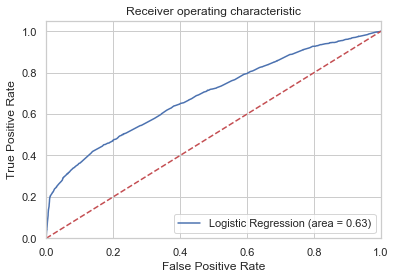

In [77]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The purpose of this section is to visualize logistic regression classsifiers’ decision boundaries. In order to better vizualize the decision boundaries, we’ll perform Principal Component Analysis (PCA) on the data to reduce the dimensionality to 2 dimensions.m

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


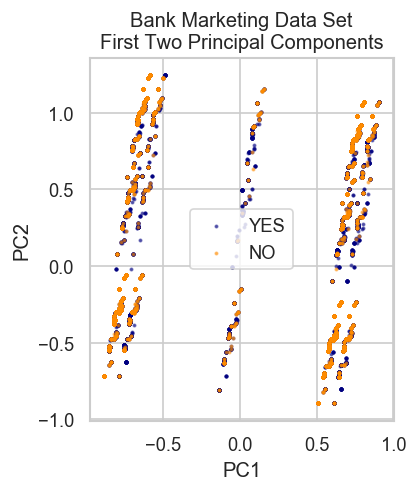

In [78]:
from sklearn.decomposition import PCA
X = data2.iloc[:,1:]
y = data2.iloc[:,0]
pca = PCA(n_components=2).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)

plt.figure(dpi=120)
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=0.5, label='YES', s=2, color='navy')
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=0.5, label='NO', s=2, color='darkorange')
plt.legend()
plt.title('Bank Marketing Data Set\nFirst Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


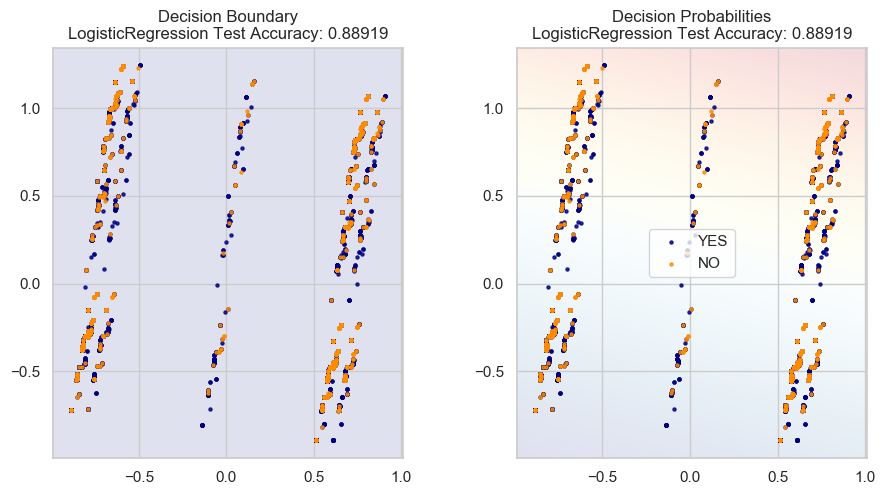

In [79]:
def plot_bank(X, y, fitted_model):
  plt.figure(figsize=(9.8,5), dpi=100)
  for i, plot_type in enumerate(['Decision Boundary', 'Decision Probabilities']):
      plt.subplot(1,2,i+1)
      mesh_step_size = 0.01  # step size in the mesh
      x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
      y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
      xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
      if i == 0:
          Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
      else:
          try:
              Z = fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
          except:
              plt.text(0.4, 0.5, 'Probabilities Unavailable', horizontalalignment='center',
                   verticalalignment='center', transform = plt.gca().transAxes, fontsize=12)
              plt.axis('off')
              break
      Z = Z.reshape(xx.shape)
      plt.scatter(X[y.values==0,0], X[y.values==0,1], alpha=0.8, label='YES', s=5, color='navy')
      plt.scatter(X[y.values==1,0], X[y.values==1,1], alpha=0.8, label='NO', s=5, color='darkorange')
      plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15, 
                 extent=(x_min, x_max, y_min, y_max), origin='lower')
      plt.title(plot_type + '\n' + 
                str(fitted_model).split('(')[0]+ ' Test Accuracy: ' + str(np.round(fitted_model.score(X, y), 5)))
      plt.gca().set_aspect('equal');
  plt.tight_layout()
  plt.legend()
  plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)
model = LogisticRegression()
model.fit(X_train,y_train)
plot_bank(X_test, y_test, model)
plt.show()

# Understanding Logistic Regression step by step

Link : https://towardsdatascience.com/understanding-logistic-regression-step-by-step-704a78be7e0a

Training a logistic regression classifier to predict people’s gender based on their weight and height.

consider the task of predicting someone’s gender (Male/Female) based on their Weight and Height.

Each sample contains three columns: Height, Weight, and Male.
    
Height in inches

Weight in pounds

Male: 1 means that the measurement corresponds to a male person, and 0 means that the measurement corresponds to a female person.
There are 5,000 samples from males, and 5,000 samples for females, thus the data set is balanced and we can proceed to training.

The Python’s scikit-learn code to train a logistic regression classifier and make a prediction is very straightforward:

In [1]:
import numpy as np
from sklearn import linear_model

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
# load data
data = np.loadtxt('./weight-height1.csv', delimiter=',', skiprows=1)

In [8]:
X = data[:,0:2]
y = data[:,2]

In [13]:
# Fit (train) the Logistic Regression classifier

clf = linear_model.LogisticRegression( C=1e40,solver='newton-cg')

fitted_model = clf.fit(X,y)

In [18]:
#Predict
Predict_result = clf.predict([(70,180)])
Predict_result

array([1.])

The general workflow is:
    
get a dataset

train a classifier

make a prediction using such classifier

# Logistic regression hypothesis

The logistic regression classifier can be derived by analogy to the linear regression hypothesis which is:


In [15]:
# For theta_0:
print( fitted_model.intercept_ )
# For theta_1 and theta_2:
print( fitted_model.coef_ )

[0.69254177]
[[-0.49261999  0.19834042]]
